In [1]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import torch.nn as nn
from torch import optim
import torchvision
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [3]:
train_data = datasets.MNIST(root = 'data' , train = True , download = True , transform = ToTensor())
test_data = datasets.MNIST(root = 'data' , train = False , transform = ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 93196097.92it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 110828631.13it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 25177535.71it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 14722201.52it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
train_data.targets[0]

tensor(5)

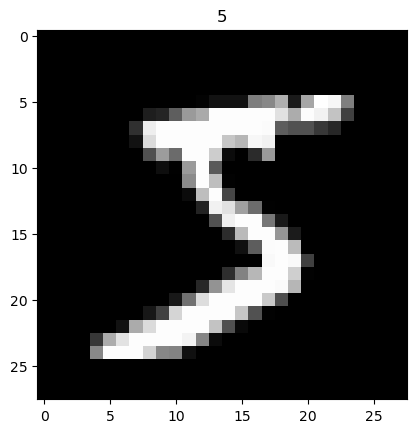

In [5]:
plt.imshow(train_data.data[0] , cmap = 'gray')
plt.title(f"{train_data.targets[0]}")
plt.show()

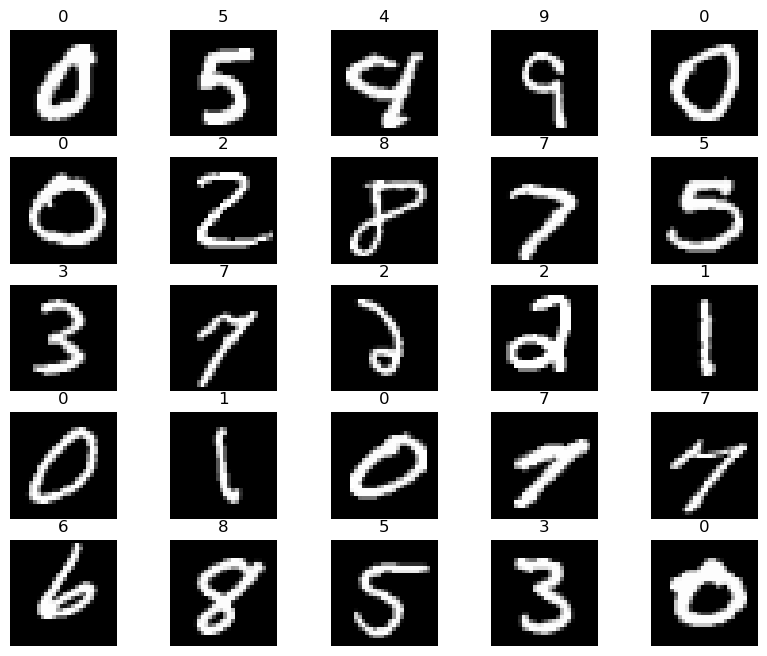

In [6]:
figure = plt.figure(figsize=(10,8))

for i in range(25):
    idx = torch.randint(len(train_data), size=(1,)).item()
    image , label = train_data[idx]
    figure.add_subplot(5 , 5 , i + 1)
    plt.imshow(image.squeeze() , cmap='gray')
    plt.title(label)
    plt.axis('off')
plt.show()

In [7]:
print(train_data.data.size())
print(test_data.data.size())

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


In [8]:
train_data_loader = torch.utils.data.DataLoader(train_data , batch_size = 100 , shuffle = True , num_workers = 1)
test_data_loader = torch.utils.data.DataLoader(test_data , batch_size = 100 , shuffle = True , num_workers = 1)

In [9]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1 =  nn.Sequential(
            nn.Conv2d(in_channels = 1 , out_channels = 16 , kernel_size = 5 , padding = 2 , stride = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2),
            )

        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels = 16 , out_channels = 32 , kernel_size = 5 , padding  = 2 ,stride = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
            )

        self.fc = nn.Linear(32 * 7 * 7 , 10)
            
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        
        x = x.view(x.size(0) , -1)
        
        output = self.fc(x)
        return output 

In [10]:
def train(net , train_data_loader , criterion , optimizer , num_epochs = 10):
    
    net.train()
    
    for iteration in range(num_epochs):
        for i , data in enumerate(train_data_loader):
            
            inp_data , labels = data
            inp_data , labels = inp_data.to(device) , labels.to(device)
     
            outputs = net(inp_data)
            loss_val = criterion(outputs , labels)

            optimizer.zero_grad()

            loss_val.backward()

            optimizer.step()

            if (i + 1) % 100 == 0:
                print(f" Epoch = [{iteration + 1} / {num_epochs}] Step = [{i + 1} / {len(train_data_loader)}] Loss = {loss_val.item()} ")

In [11]:
def test(net ,test_data_loader , criterion):
    correct = 0 
    total = 0
    test_loss = 0
    y_pred = []
    y_true = []
    
    net.eval()
    
    with torch.no_grad():
        for data in test_data_loader:
            inp_data , labels = data
            inp_data , labels = inp_data.to(device) , labels.to(device)
            
            outputs  = net(inp_data)
            
            loss_val = criterion(outputs , labels)
            
            test_loss += loss_val.item()
            
            pred_y = torch.max(outputs , 1)[1].data.squeeze()
            total += labels.size(0)
            
            y_pred += pred_y.cpu().tolist()
            y_true += labels.cpu().tolist()
            
            correct += (pred_y == labels).sum().item()
            
    accuracy = correct / total
    print(f"Test Accuracy of the model is : {accuracy * 100 : .2f} %")
    print(f"Overall test loss of the model is : {test_loss} ")
    return y_true, y_pred
    

In [12]:
cnn = CNN().to(device)
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn.parameters() , lr = 0.01)

train(cnn , train_data_loader , loss , optimizer , num_epochs = 10)

 Epoch = [1 / 10] Step = [100 / 600] Loss = 0.22635294497013092 
 Epoch = [1 / 10] Step = [200 / 600] Loss = 0.12219616770744324 
 Epoch = [1 / 10] Step = [300 / 600] Loss = 0.08034411072731018 
 Epoch = [1 / 10] Step = [400 / 600] Loss = 0.021883992478251457 
 Epoch = [1 / 10] Step = [500 / 600] Loss = 0.13245068490505219 
 Epoch = [1 / 10] Step = [600 / 600] Loss = 0.0434754453599453 
 Epoch = [2 / 10] Step = [100 / 600] Loss = 0.02420744113624096 
 Epoch = [2 / 10] Step = [200 / 600] Loss = 0.0589129738509655 
 Epoch = [2 / 10] Step = [300 / 600] Loss = 0.09476358443498611 
 Epoch = [2 / 10] Step = [400 / 600] Loss = 0.029873322695493698 
 Epoch = [2 / 10] Step = [500 / 600] Loss = 0.04350225627422333 
 Epoch = [2 / 10] Step = [600 / 600] Loss = 0.021981289610266685 
 Epoch = [3 / 10] Step = [100 / 600] Loss = 0.04280167073011398 
 Epoch = [3 / 10] Step = [200 / 600] Loss = 0.04570970684289932 
 Epoch = [3 / 10] Step = [300 / 600] Loss = 0.03235385939478874 
 Epoch = [3 / 10] Step =

In [13]:
y_true, y_pred = test(cnn ,test_data_loader , loss)

Test Accuracy of the model is :  98.42 %
Overall test loss of the model is : 9.484847819661354 


In [14]:
print(classification_report(y_true , y_pred , labels = range(0, 10)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.96      0.98       892
           6       0.97      0.99      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.96      0.99      0.97       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [15]:
print(confusion_matrix(y_true , y_pred))

[[ 968    1    0    1    0    0    9    0    1    0]
 [   1 1127    0    1    0    0    5    1    0    0]
 [   1    0 1016    0    3    0    3    6    2    1]
 [   0    0    2  997    0    1    0    1    9    0]
 [   0    2    0    0  965    0    4    1    1    9]
 [   1    1    0    7    0  858    5    0   16    4]
 [   0    3    0    0    2    0  949    0    4    0]
 [   0    2    3    3    0    0    0 1017    1    2]
 [   2    1    3    0    0    1    3    1  961    2]
 [   1    4    0    0    5    4    1    5    5  984]]


In [16]:
import pandas as pd
import numpy as np
cf_matrix =  confusion_matrix(y_true , y_pred)
print(cf_matrix)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in range(10)],
                     columns = [i for i in range(10)])

[[ 968    1    0    1    0    0    9    0    1    0]
 [   1 1127    0    1    0    0    5    1    0    0]
 [   1    0 1016    0    3    0    3    6    2    1]
 [   0    0    2  997    0    1    0    1    9    0]
 [   0    2    0    0  965    0    4    1    1    9]
 [   1    1    0    7    0  858    5    0   16    4]
 [   0    3    0    0    2    0  949    0    4    0]
 [   0    2    3    3    0    0    0 1017    1    2]
 [   2    1    3    0    0    1    3    1  961    2]
 [   1    4    0    0    5    4    1    5    5  984]]


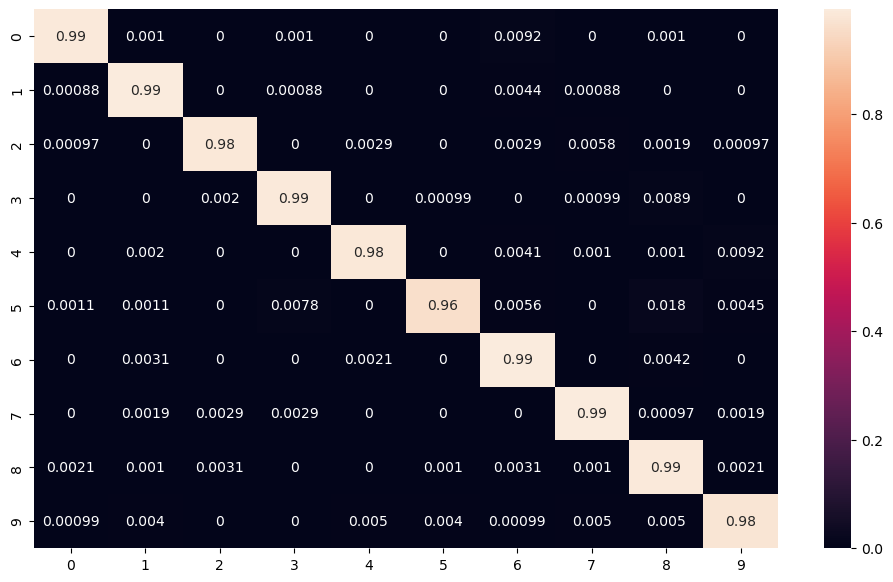

In [17]:
import seaborn as sn 

plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('cnn.png')

In [18]:
resnet = torchvision.models.resnet18(num_classes = 10)
resnet.conv1 =  torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
resnet.fc = torch.nn.Linear(resnet.fc.in_features, 10)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet.parameters() , lr = 0.01)

train(resnet.to(device) , train_data_loader , criterion , optimizer)

 Epoch = [1 / 10] Step = [100 / 600] Loss = 0.3869877755641937 
 Epoch = [1 / 10] Step = [200 / 600] Loss = 0.15460601449012756 
 Epoch = [1 / 10] Step = [300 / 600] Loss = 0.10964937508106232 
 Epoch = [1 / 10] Step = [400 / 600] Loss = 0.03850439190864563 
 Epoch = [1 / 10] Step = [500 / 600] Loss = 0.09986656159162521 
 Epoch = [1 / 10] Step = [600 / 600] Loss = 0.04241626709699631 
 Epoch = [2 / 10] Step = [100 / 600] Loss = 0.07753987610340118 
 Epoch = [2 / 10] Step = [200 / 600] Loss = 0.039692170917987823 
 Epoch = [2 / 10] Step = [300 / 600] Loss = 0.08875523507595062 
 Epoch = [2 / 10] Step = [400 / 600] Loss = 0.0503302626311779 
 Epoch = [2 / 10] Step = [500 / 600] Loss = 0.03666438162326813 
 Epoch = [2 / 10] Step = [600 / 600] Loss = 0.019252637401223183 
 Epoch = [3 / 10] Step = [100 / 600] Loss = 0.055911801755428314 
 Epoch = [3 / 10] Step = [200 / 600] Loss = 0.01183493621647358 
 Epoch = [3 / 10] Step = [300 / 600] Loss = 0.17606665194034576 
 Epoch = [3 / 10] Step =

In [19]:
y_true, y_pred = test(resnet.to(device) , test_data_loader , criterion )

Test Accuracy of the model is :  99.00 %
Overall test loss of the model is : 3.202715707011521 


In [20]:
print(classification_report(y_true , y_pred , labels = range(0, 10)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       1.00      0.99      1.00      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [21]:
import pandas as pd
import numpy as np
cf_matrix =  confusion_matrix(y_true , y_pred)
print(cf_matrix)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in range(10)],
                     columns = [i for i in range(10)])

[[ 979    0    0    0    0    0    0    1    0    0]
 [   4 1129    0    1    0    0    1    0    0    0]
 [   2    1 1024    1    1    0    0    3    0    0]
 [   0    0    0 1004    0    4    0    2    0    0]
 [   0    0    0    0  968    0    0    0    0   14]
 [   1    0    0    4    0  883    1    2    0    1]
 [   8    1    0    0    4    1  944    0    0    0]
 [   0    7    2    2    0    0    0 1015    0    2]
 [   8    1    0    9    0    1    1    0  951    3]
 [   2    0    0    0    2    1    0    1    0 1003]]


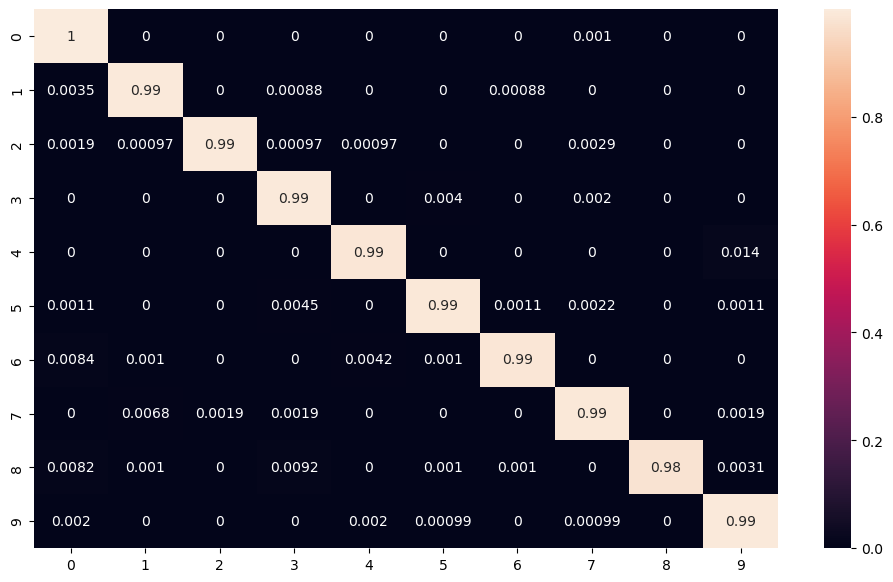

In [22]:
import seaborn as sn 

plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('resnet.png')